# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(111)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

<!-- Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
 -->

In [ ]:
# Perform API calls

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1ce140a3c50d5a93fdf303c209b63aa3&units=Imperial&q='

In [6]:
# set up lists to hold reponse info
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
num = 0
# Loop through the list of cities and perform a request for data on each
for num, city in enumerate(cities):
    try:
        response = requests.get(query_url + city, time.sleep(1)).json()
        print(response)
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
       
        
        print(f'Processing record {num} of {len(cities)} complete. | {city}')
    except:
        print('City not found. Skipping...')


{'coord': {'lon': 75.1833, 'lat': 20.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 64.81, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1016, 'humidity': 43}, 'visibility': 6000, 'wind': {'speed': 11.23, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1612623630, 'sys': {'type': 1, 'id': 9057, 'country': 'IN', 'sunrise': 1612575185, 'sunset': 1612616017}, 'timezone': 19800, 'id': 1266631, 'name': 'Khuldābād', 'cod': 200}
Processing record 0 of 632 complete. | khuldabad
{'coord': {'lon': -73.9662, 'lat': 42.6001}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.81, 'feels_like': 24.76, 'temp_min': 28.99, 'temp_max': 32, 'pressure': 1010, 'humidity': 66}, 'visibility': 4661, 'wind': {'speed': 1.99, 'deg': 304, 'gust': 7}, 'clouds': {'all': 68}, 'dt': 1612623633, 'sys': {'type': 3, 'id': 2037353, 'country': 'US',

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,humidity,cloudiness,windspeed,Country,Date
0,Khuldābād,20.0500,75.1833,71.60,43,0,11.23,IN,1612623630
1,Albany,42.6001,-73.9662,32.00,66,68,1.99,US,1612623633
2,Soe,-9.8607,124.2840,66.56,98,87,3.40,ID,1612623635
3,Atasū,48.6814,71.6433,31.87,93,100,21.90,KZ,1612623689
4,Lebu,-37.6167,-73.6500,62.19,79,98,5.88,CL,1612623691


In [11]:
# export dataframe into csv
weather_data.to_csv("output_data_file", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Check to see if there are cities with humidity over 100%.
max_hum = weather_data['humidity'].max()


100

In [ ]:
# for weather in weather_data:
#     if humidity > 100
    
    

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

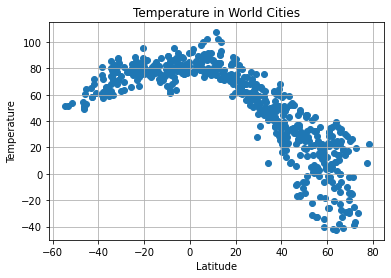

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)


## Latitude vs. Humidity Plot

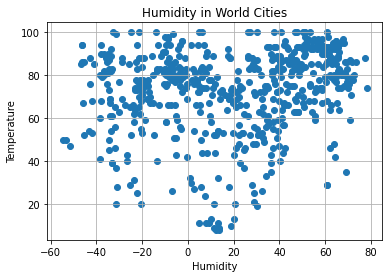

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Humidity")
plt.grid(True)


## Latitude vs. Cloudiness Plot

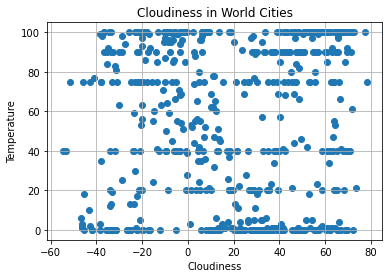

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Cloudiness")
plt.grid(True)


## Latitude vs. Wind Speed Plot

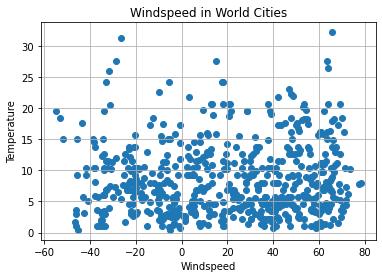

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Windspeed")
plt.grid(True)


## Linear Regression

In [30]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["temp"])

# Get regression values
regress_values = weather_data["lat"] * slope + intercept
print(regress_values)

0      51.424078
1      34.374378
2      74.038988
3      29.776423
4      95.024770
         ...    
579    61.392098
580    30.910015
581    42.162541
582    90.020271
583    42.288126
Name: lat, Length: 584, dtype: float64


In [31]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.76x +66.58


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression